In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
data_ori=pd.read_csv("Obesity Classification.csv")
df=data_ori.copy()

In [3]:
df

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175,80,25.3,Normal Weight
1,2,30,Female,160,60,22.5,Normal Weight
2,3,35,Male,180,90,27.3,Overweight
3,4,40,Female,150,50,20.0,Underweight
4,5,45,Male,190,100,31.2,Obese
...,...,...,...,...,...,...,...
103,106,11,Male,175,10,3.9,Underweight
104,107,16,Female,160,10,3.9,Underweight
105,108,21,Male,180,15,5.6,Underweight
106,109,26,Female,150,15,5.6,Underweight


## Data cleaning

In [4]:
df=df.drop("ID",axis=1)

In [5]:
df

,Age,Gender,Height,Weight,BMI,Label
0,25,Male,175,80,25.3,Normal Weight
1,30,Female,160,60,22.5,Normal Weight
2,35,Male,180,90,27.3,Overweight
3,40,Female,150,50,20.0,Underweight
4,45,Male,190,100,31.2,Obese
...,...,...,...,...,...,...
103,11,Male,175,10,3.9,Underweight
104,16,Female,160,10,3.9,Underweight
105,21,Male,180,15,5.6,Underweight
106,26,Female,150,15,5.6,Underweight


## Data view and Data Visualization

In [6]:
len(df)

108

In [7]:
df.describe()

,Age,Height,Weight,BMI
count,108.000000,108.000000,108.000000,108.000000
mean,46.555556,166.574074,59.490741,20.549074
std,24.720620,27.873615,28.856233,7.583818
min,11.000000,120.000000,10.000000,3.900000
25%,27.000000,140.000000,35.000000,16.700000
50%,42.500000,175.000000,55.000000,21.200000
75%,59.250000,190.000000,85.000000,26.100000
max,112.000000,210.000000,120.000000,37.200000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     108 non-null    int64  
 1   Gender  108 non-null    object 
 2   Height  108 non-null    int64  
 3   Weight  108 non-null    int64  
 4   BMI     108 non-null    float64
 5   Label   108 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 5.2+ KB


In [9]:
df.isnull().sum()

Age       0
Gender    0
Height    0
Weight    0
BMI       0
Label     0
dtype: int64

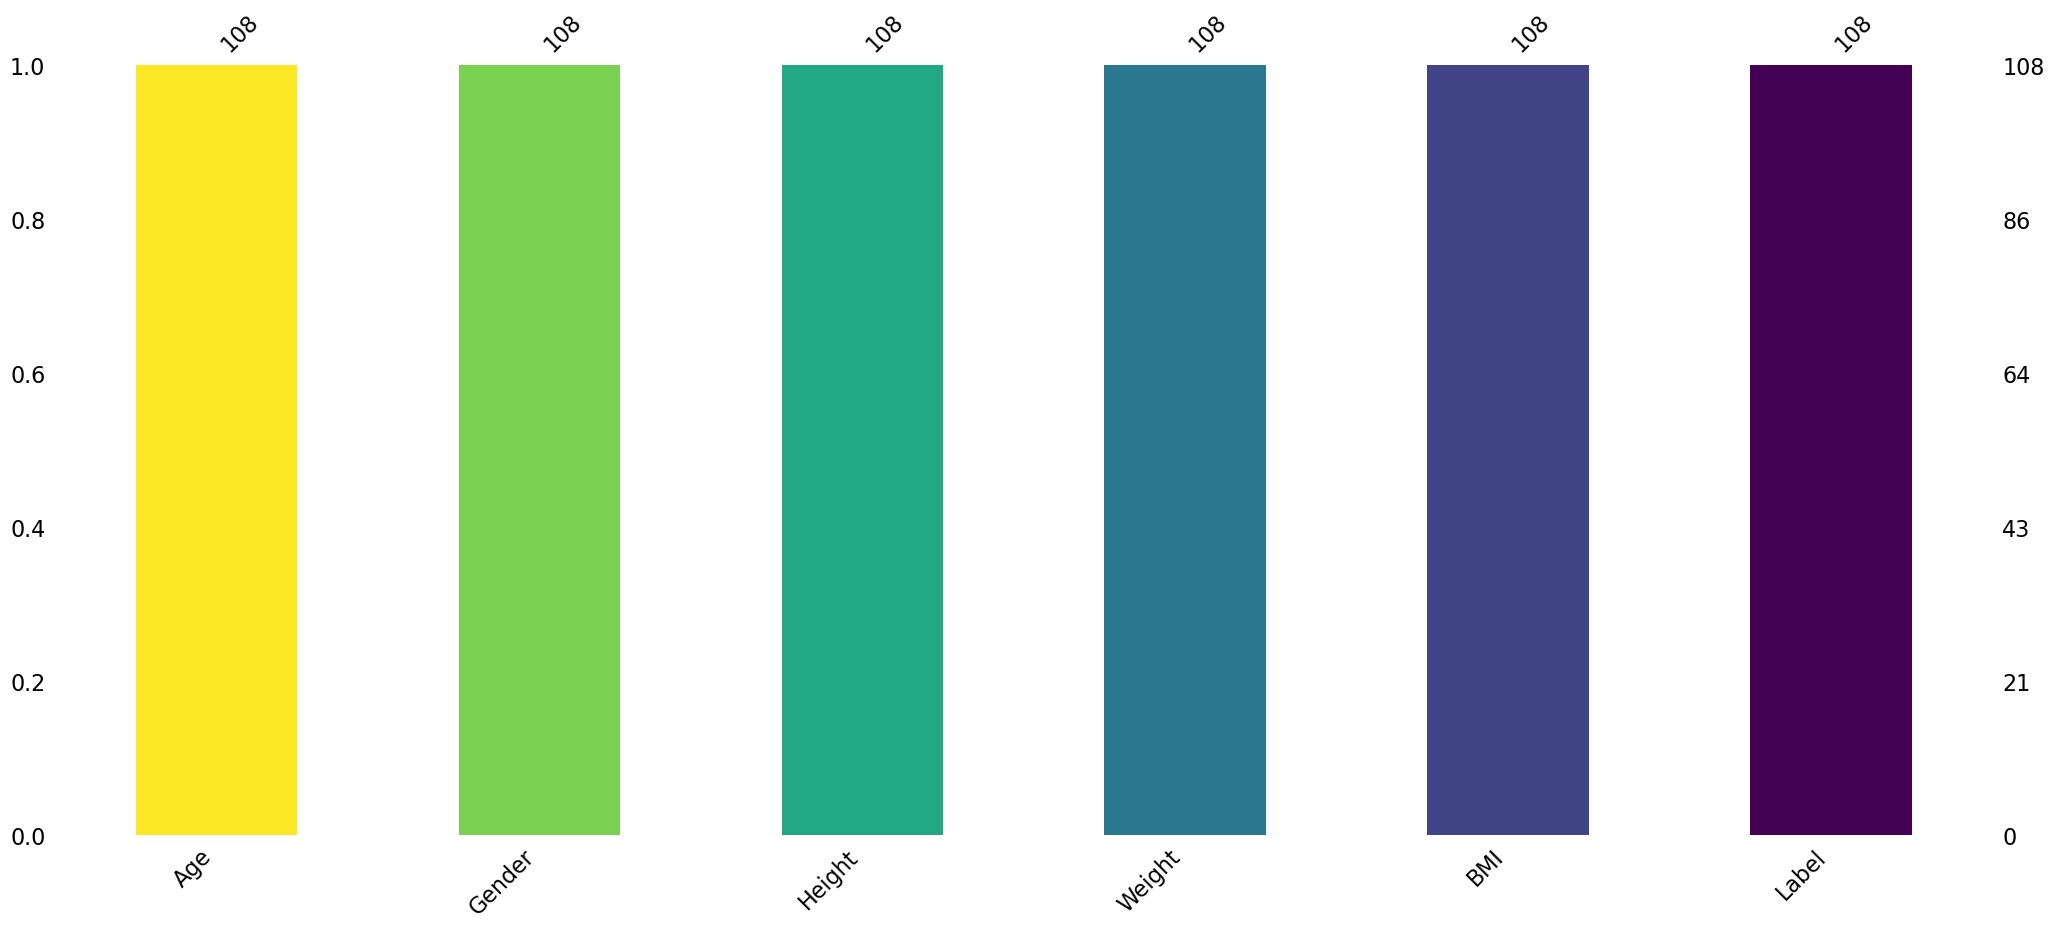

In [11]:
import missingno as msno
num_column=len(df.columns)
colors=plt.cm.viridis(np.linspace(1,0,(num_column)))
msno.bar(df,color=colors)
plt.show()


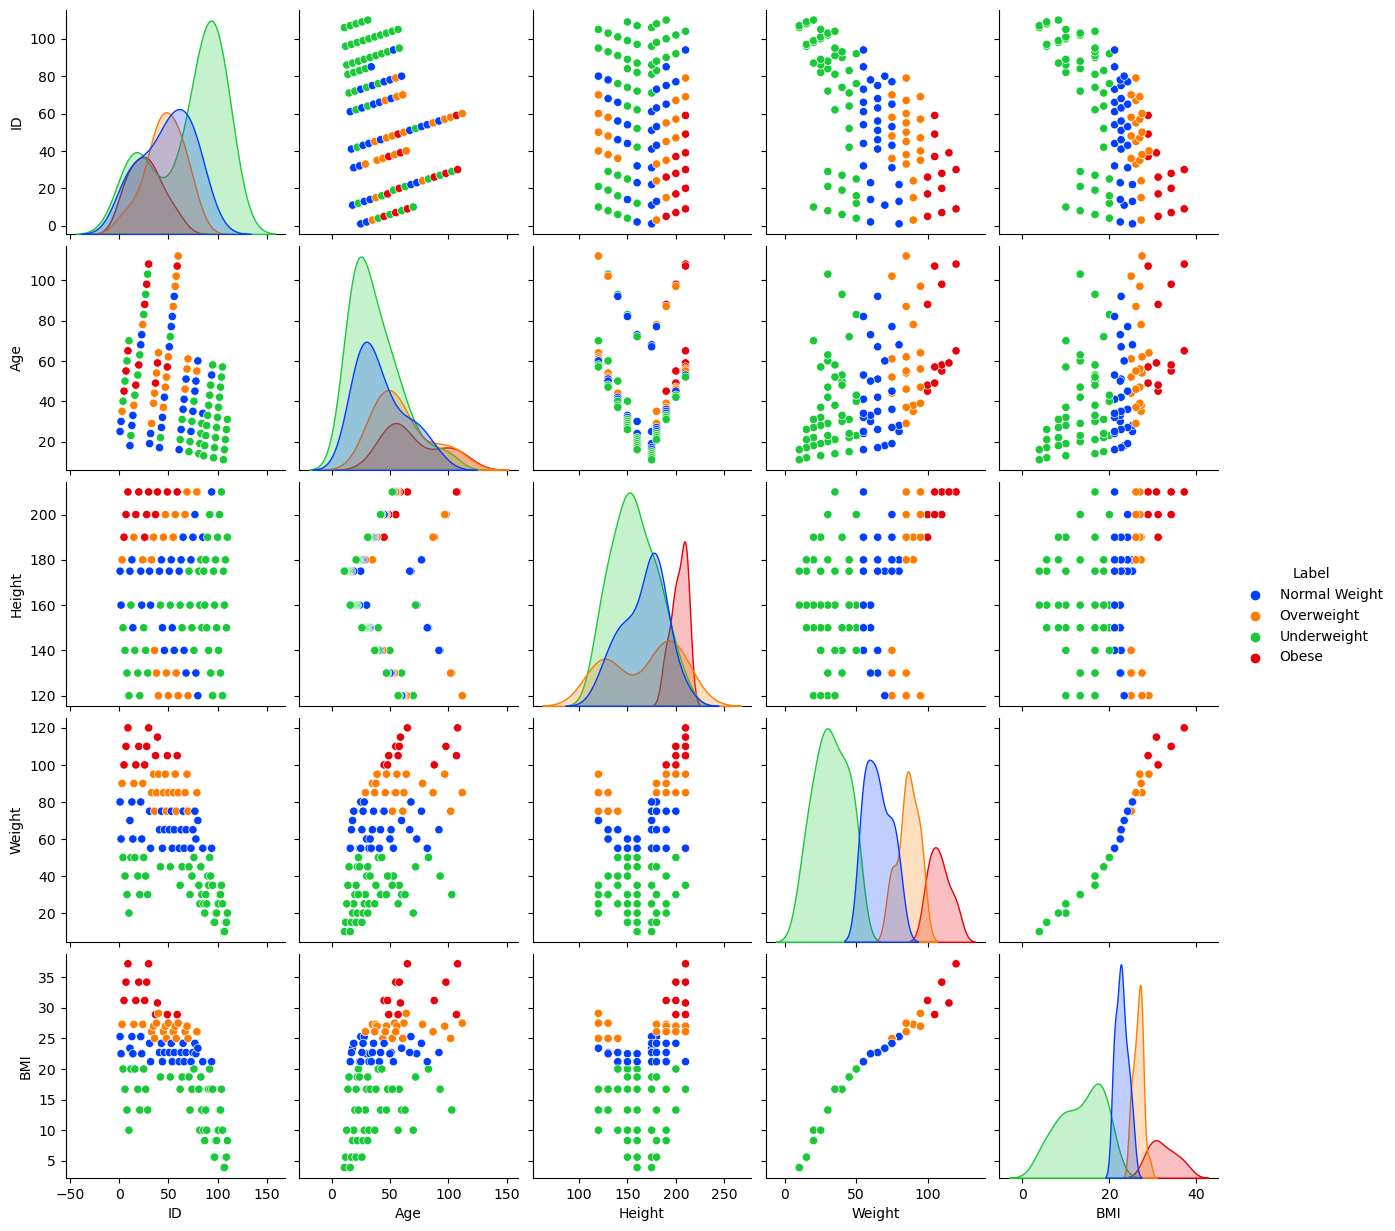

In [76]:
sns.pairplot(data=data_ori,hue='Label',palette='bright')
plt.show()

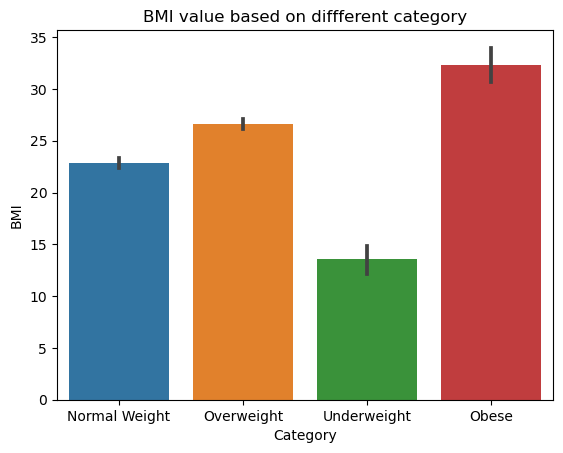

In [13]:
sns.barplot(data=df,x="Label",y="BMI")
plt.title("BMI value based on diffferent category")
plt.xlabel("Category")
plt.ylabel("BMI")
plt.show()

In [15]:
count=df["Label"].value_counts()
count

Underweight      47
Normal Weight    29
Overweight       20
Obese            12
Name: Label, dtype: int64

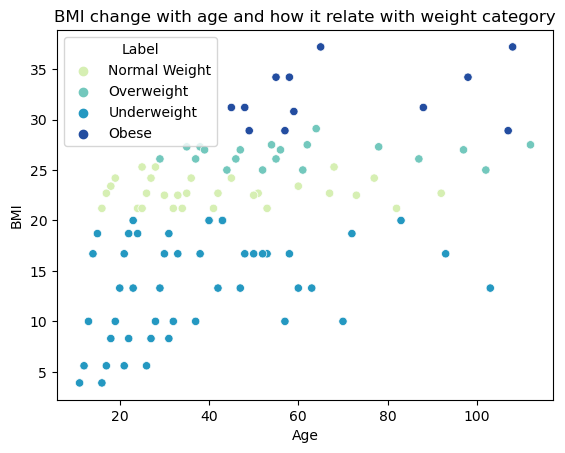

In [21]:
sns.scatterplot(data=df,x="Age",y="BMI",hue="Label",palette="YlGnBu")
plt.title("BMI change with age and how it relate with weight category")
plt.xlabel("Age")
plt.ylabel("BMI")
plt.show()

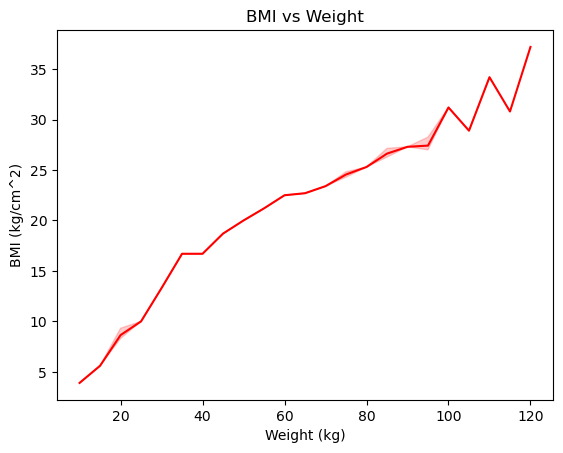

In [25]:
sns.lineplot(data=df,x="Weight",y="BMI",color="red")
plt.title("BMI vs Weight")
plt.xlabel("Weight (kg)")
plt.ylabel("BMI (kg/cm^2)")
plt.show()

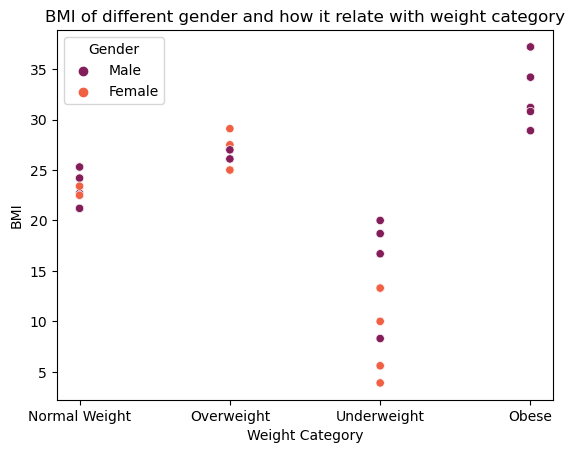

In [78]:
sns.scatterplot(data=data_ori,x="Label",y="BMI",hue="Gender",palette="rocket")
plt.title("BMI of different gender and how it relate with weight category")
plt.xlabel("Weight Category")
plt.ylabel("BMI")
plt.show()

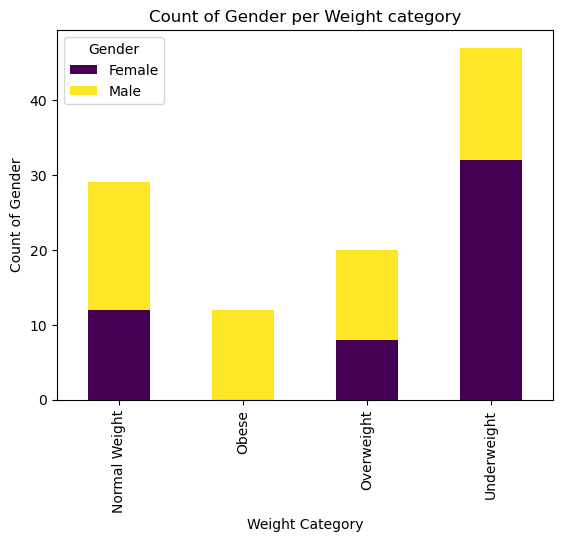

In [32]:
crosstab=pd.crosstab(df["Label"],df["Gender"]) ## count of gender per label
crosstab.plot(kind="bar",stacked=True,cmap="viridis")
plt.title("Count of Gender per Weight category")
plt.xlabel("Weight Category")
plt.ylabel("Count of Gender")
plt.show()


### Convert Non-numerical data to numerical

In [36]:
# set male=1,female=0
df["Gender"]=df["Gender"].apply(lambda x:1 if x=="Male" else 0)

In [42]:
for label,content in df.items():
        if pd.api.types.is_string_dtype(content):
            df[label]=content.astype("category").cat.as_ordered()

In [45]:
for label,content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        df[label]=pd.Categorical(content).codes

In [46]:
df

,Age,Gender,Height,Weight,BMI,Label
0,25,1,175,80,25.3,0
1,30,0,160,60,22.5,0
2,35,1,180,90,27.3,2
3,40,0,150,50,20.0,3
4,45,1,190,100,31.2,1
...,...,...,...,...,...,...
103,11,1,175,10,3.9,3
104,16,0,160,10,3.9,3
105,21,1,180,15,5.6,3
106,26,0,150,15,5.6,3


In [47]:
data_ori

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175,80,25.3,Normal Weight
1,2,30,Female,160,60,22.5,Normal Weight
2,3,35,Male,180,90,27.3,Overweight
3,4,40,Female,150,50,20.0,Underweight
4,5,45,Male,190,100,31.2,Obese
...,...,...,...,...,...,...,...
103,106,11,Male,175,10,3.9,Underweight
104,107,16,Female,160,10,3.9,Underweight
105,108,21,Male,180,15,5.6,Underweight
106,109,26,Female,150,15,5.6,Underweight


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     108 non-null    int64  
 1   Gender  108 non-null    int64  
 2   Height  108 non-null    int64  
 3   Weight  108 non-null    int64  
 4   BMI     108 non-null    float64
 5   Label   108 non-null    int8   
dtypes: float64(1), int64(4), int8(1)
memory usage: 4.5 KB


## Modelling

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,auc
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [52]:
### split data into train and test

np.random.seed(42)
X=df.drop("Label",axis=1)
y=df["Label"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [53]:
## scale the data

scaler=StandardScaler()
X_train_tx=scaler.fit_transform(X_train)
X_test_tx=scaler.transform(X_test)

In [55]:
## Fit a model

#1 logreg

reg=LogisticRegression()
reg.fit(X_train_tx,y_train)

#2. svc
svc=SVC()
svc.fit(X_train_tx,y_train)

#3. knn

knn=KNeighborsClassifier()
knn.fit(X_train_tx,y_train)

#4. randomforest

clf=RandomForestClassifier()
clf.fit(X_train,y_train)

RandomForestClassifier()

In [56]:
y_pred_reg=reg.predict(X_test_tx)
y_pred_svc=svc.predict(X_test_tx)
y_pred_knn=knn.predict(X_test_tx)
y_pred_clf=clf.predict(X_test)

In [60]:
score=[]

model=[reg,svc,knn]

for ev in model:
    a=ev.score(X_test_tx,y_test)
    score.append(a)
    
  

In [61]:
print(score)

[0.9545454545454546, 0.9090909090909091, 0.8636363636363636]


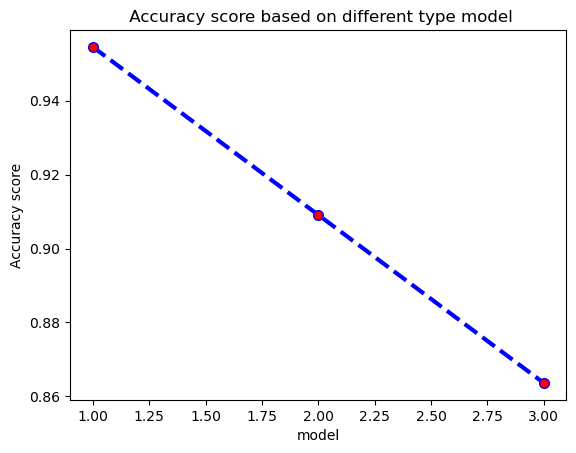

In [71]:
m=[1,2,3]
plt.plot(m,score,ls="dashed",lw=3,marker="o",color="blue",mfc="red",markersize=7)
## For x-axis 1 represent as model 1, and etc
plt.title(" Accuracy score based on different type model")
plt.xlabel("model")
plt.ylabel("Accuracy score")
plt.show()